In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from matplotlib.pyplot import spy
from scipy.sparse import spdiags, kron, eye

In [6]:
nx = 16  # Adjust the value of nx as needed

sub_size = int(np.sqrt(nx))

main_diag = np.ones(nx) * (-4)
off_diag = np.ones(nx - 1)
sub_block = np.ones(nx - sub_size)

# Create the main diagonal matrix
main_diag_matrix = np.diag(main_diag)

# Create the 1 and -1 diagonals matrices
off_diag_matrix = np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) + np.diag(sub_block, k=sub_size) + np.diag(sub_block, k=-sub_size)

# Create the identity matrices for the upper-right and lower-left corners
upperright_i = np.ones(sub_size)
lowerleft_i = np.ones(sub_size)
corner_matrix = np.diag(upperright_i, k=nx - sub_size) + np.diag(upperright_i, k=-(nx - sub_size))

# Combine the matrices to form the final 2D array A
A = main_diag_matrix + off_diag_matrix + corner_matrix

print(A)

plt.figure(figsize=(8, 6))
spy(A, markersize=1, aspect='auto')
plt.title('Sparse Matrix Pattern')
plt.show()

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

  (0, 0)	-4.0
  (0, 1)	1.0
  (0, 999)	1.0
  (0, 1000)	1.0
  (0, 0)	-4.0
  (0, 1)	1.0
  (0, 999)	1.0
  (0, 1000)	2.0


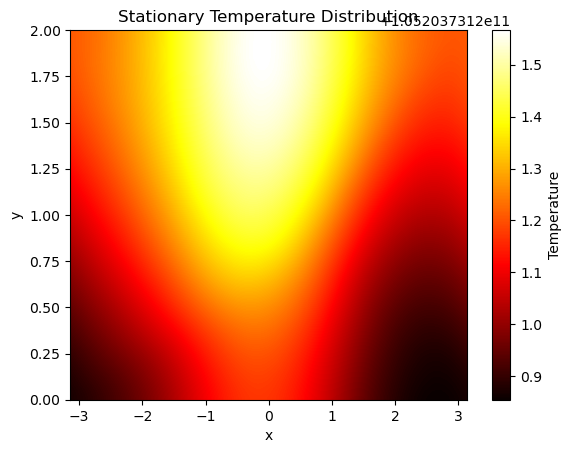

In [12]:
# Define the parameters
L = np.pi  # Domain size in x-direction
H = 2      # Domain size in y-direction
nx = 1000   # Number of grid points in x-direction
ny = 1000   # Number of grid points in y-direction

# Discretize the domain
x = np.linspace(-np.pi, np.pi, nx)
y = np.linspace(0, 2, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Define the source term
f = -np.cos(X)
f[:,0:250] = 0
f[:,750:] = 0

# Setting the boundary to 0
f[0,:] += 0

# Set up the sparse matrix for the finite difference method
e = np.ones(nx)
I = np.eye(nx)
T = spdiags([e, -4 * e, e, e, e], [-1, 0, 1, nx-1, -(nx-1)], nx, nx)
S = spdiags([e, e], [-1, 1], nx, nx)
A = kron(I, T) + kron(S, I)
# for i in range(nx):
#     A[nx**2-2*nx+i, nx**2-nx+i] += 1

for i in range(nx):
    A[nx**2-nx+i, nx**2-2*nx+i] += 1
    
# plt.figure(figsize=(8, 6))
# spy(A, markersize=1, aspect='auto')
# plt.title('Sparse Matrix Pattern')
# plt.show()

# Construct the right-hand side
b = f.flatten()

# Solve the system of linear equations
u = spsolve(A, b*dx*dy)

# Reshape the solution to a 2D array for plotting
u = u.reshape((nx, ny))

# Plot the stationary temperature distribution
plt.imshow(u, extent=[-np.pi, np.pi, 0, 2], origin='lower', cmap='hot', aspect='auto')
plt.colorbar(label='Temperature')
plt.title('Stationary Temperature Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()